In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Introduction and Data description.

**Introduction**
This project is going to assess the ability to use machine learning methods to predict if a sample is benign or malignant based on the analysis of the nuclei of cells from a fine needle aspiration alone. The significance of building machine learning models for diagnosis lies in the potential to improve different aspect of cancer management such as:

*   Early detection and diagnosis as the accuracy and sensitivty of these models can provide reliable results
*   Clinical decision support and reducing the subjectivity related to human interpretation thus giving an objective approach.
- Research and discovery of potential connections between diagnosis and cellular features that were not known previously.
- Streamline healthcare resources by reducing workload on healthcare workers.


In summary the significance of developing such models can help with efficiency, accuracy, and speed of diagnosis, ultimately leading to improved patient outcomes and contributing to advancements in healthcare practices.



---
**Data**
The dataset chosen is publically avaiable. It contains features computed from digitalised images of samples suspicious for malignancy. The reported measures are based on the nuclei of the cells obtained from fine needle aspirations of 569 patients. The measures are divided into 3 subsections, mean, standard error and worst. Each subsection contains 10 parameters : radius, texture, area, perimeter, compactness, concave points, fractal dimension, smoothness, concavity and symmetry. The target variable is also included and is catagorised and either malignant(M) or benign(B).


The dataset was obtained from kaggle and can be found here:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download





#Library imports

In [3]:
import pandas as pd #for processing data
import numpy as np
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.transform import linear_cmap
from bokeh.models import BasicTicker, PrintfTickFormatter


#Data Import, Preparation and Visualistaion.

In [5]:
#The dataset was downloaded from kaggle as a flat file in a CSV format, it is imported below as a pandas df.
df = pd.read_csv('./breast_cancer.csv')

#Initial analysis of the df
print("Total data points",df.shape[0]) #investigating the number of rows, i.e. samples
print("Total number of features(as number of columns) are ", df.shape[1]) #investigating the number of columes i.e. features

df.head() #Taking a look at the first 5 rows to see the contents of the columns


FileNotFoundError: [Errno 2] No such file or directory: './breast_cancer.csv'

In [ ]:
df.drop(columns = ['id','Unnamed: 32'], inplace = True) #removing these columns because they will not be informative to the model.

df.head() #checking they were removed correctly

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.info()) #To provide a summary of the df to check for missing values and also the data type in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
print(df.describe(include='all')) #checking the summary stats of the dataframe based on each column by applyign aggregation functions.
df['diagnosis'].value_counts() #getting an exact count of the target variables

       diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000   

diagnosis
B    357
M    212
Name: count, dtype: int64

The previous two steps were carried out to check for missing datapoints. Dealing with missing datapoints is context dependent, i.e. do we want to impute values or remove them completely.

There are no cells with missing values in the df(the Nan values are for the categorical data that doesn't apply to the columns with numerical data). Since all the columns return datatype of float there is no datapoints with 'unkown' in place of a msising value either. However, if we look at two columns related to concavity there is a min value of 0. In this instance it is not likely that this is a missing value as a cell contour can have a value of zero thus no removal/imputing is needed.

These summary stats also tell us that between the features there are different scales in the data such as area mean being in the hundreds while concavity is in decimal places. This would indicate we might need to transform the data for analysis or depending on the type of model that is going to be utilised.


In [ ]:
dup = df.duplicated()

print(dup.unique())

[False]


As we can see here there are no duplicated rows in the df so we do not need to consider removing any.

Benign samples total:  357
Malignant samples total:  212 



/var/folders/88/0g6pvhrn3pzgzgl2mllw0zm40000gn/T/ipykernel_30263/2189400387.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Benign samples total: ',counts[0])
/var/folders/88/0g6pvhrn3pzgzgl2mllw0zm40000gn/T/ipykernel_30263/2189400387.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Malignant samples total: ',counts[1], '\n')


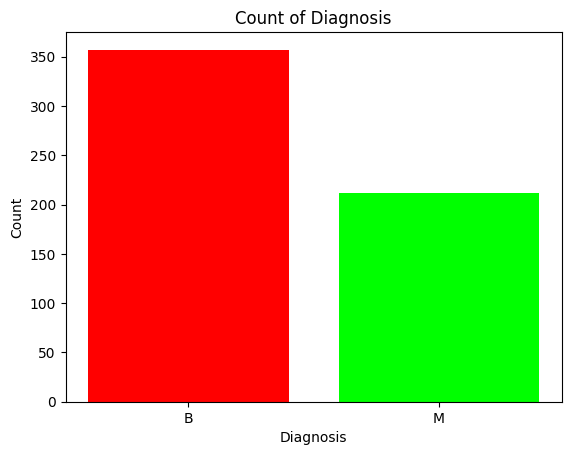

In [ ]:
custom_colours = ['#FF0000','#00FF00'] #creating a custom colour pallete to show malignant as red i.e. bad and benign as green i.e. good.

counts = df['diagnosis'].value_counts() #storing the counts of the target variable
plt.bar(counts.index, counts.values, color=custom_colours) #using matplotlib to create a bar graph of the counts

plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Count of Diagnosis')


print('Benign samples total: ',counts[0])
print('Malignant samples total: ',counts[1], '\n')


The visual representation of the counts of the target variables indicate that there is an imbalance in the number of bening vs malignant samples. This is something important to consider later on due to their potential effect on the M/L models.

In [ ]:
label = df.diagnosis # assigning the diagnosis coding to a variable as out labels. This only contains the benign or malignant variables
feature_df = df.drop('diagnosis', axis =1) #contains all the data but the labels that we may use to train the model.

print(label.head(), '\n')
print(label.count(), '\n')

print("Total rows", feature_df.shape[0])
print("Total columns", feature_df.shape[1])

#confirming that this action has been done correctly.

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object 

569 

Total rows 569
Total columns 30


Next were going to look deeper into data itself. As seen above there is a difference in the scales between features so I will standardise the data to enable comparison.


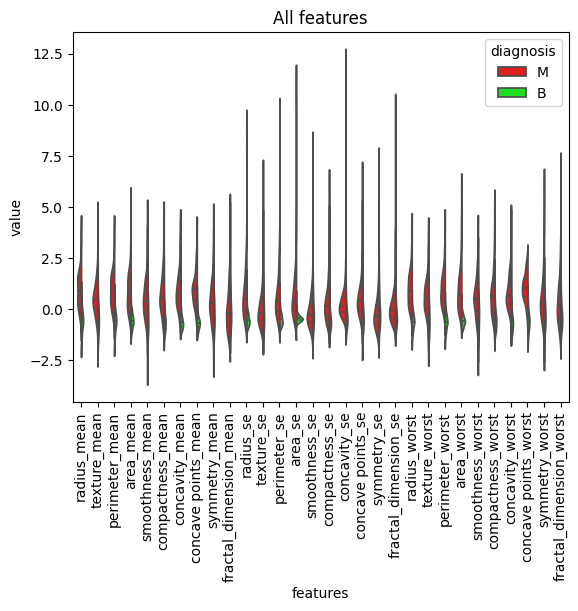

In [ ]:
noramlised_features = (feature_df- feature_df.mean())/(feature_df.std()) # this transforms the data to have a mean of 0 and a standard deviation of 1. To do so we subtract the mean and divide by the standard deviation.

#next we will rejoin the labels in order to compare the data visually between the two target variables.

normalised_data = pd.concat([label, noramlised_features],axis=1)
normalised_data_long = pd.melt(normalised_data,id_vars="diagnosis",var_name="features", value_name='value')

# here we have converted the data into a long format to use with the sns function. We keep diagnosis lables with their respective values. Store all variable names in a single column and the their value in the next column.
#uncomment below to view the format.
#print(normlised_data)

#This is a plot of all the features but this is difficult to interpret so will produce the graphs on the three major groups.
sns.violinplot(x="features", y="value", hue='diagnosis', data=normalised_data_long,split=True, inner="quart", palette = custom_colours) #Creating the violin plot with the features along the x axis, their value on y and also separating based on the tagrget label.
plt.title('All features')
plt.xticks(rotation=90);#Rotating the labels on the x axis for easier read



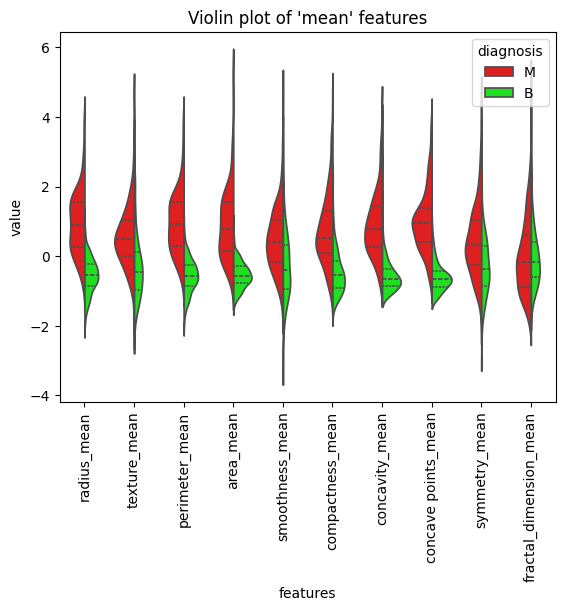

In [ ]:
features_1 = pd.concat([label, noramlised_features.iloc[:,0:10]],axis=1) #isolating the feautres associated with 'mean'
features_1 = pd.melt(features_1, id_vars= 'diagnosis', var_name = 'features', value_name = 'value')

sns.violinplot(x='features', y = 'value', hue = 'diagnosis', data = features_1, split =True, inner = 'quart', palette = custom_colours)
plt.title("Violin plot of 'mean' features")
plt.xticks(rotation = 90); #Rotating the labels on the x axis for easier read


The smaller number of features on the plot allows to see the differences between the two groups.

In order to  understand if we could classify between the two groups we want to find features that have distinct differences.

We can see in many of the features here that the median of the benign samples is much lower than that of the malignant samples, i.e. radius_mean, permiter_mean, area_mean, compactness_mean or concavity_mean. Thus these fetures could potentiall be used for the M/L model to distinguish between the diagnoses. It is also worth noting that features such as radius, permiter_mean and area_mean may be dependent on each other, due to their already established relationship, so every variable may not be necessary.

On the otherhand features such as smoothness_mean or fractal_deimension_mean have very similar values between the groups thus would not make ideal candidates for classification.

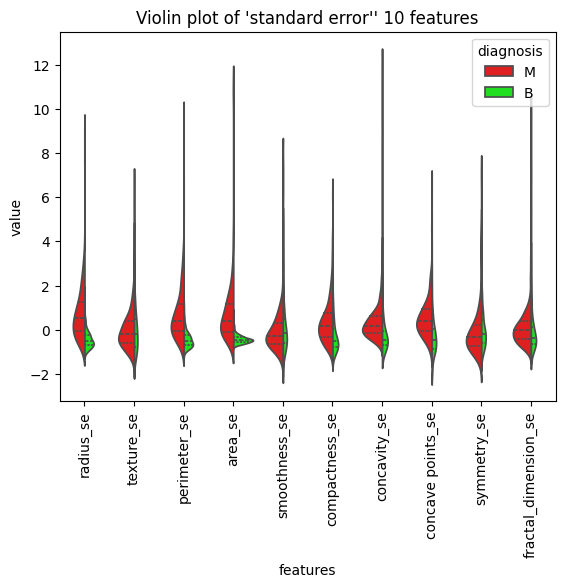

In [ ]:
features_2 = pd.concat([label, noramlised_features.iloc[:,10:20]],axis=1) # creating the next group of 'standard error' feautres
features_2 = pd.melt(features_2, id_vars= 'diagnosis', var_name = 'features', value_name = 'value')

sns.violinplot(x='features', y = 'value', hue = 'diagnosis', data = features_2, split =True, inner = 'quart', palette = custom_colours)
plt.title("Violin plot of 'standard error'' 10 features")
plt.xticks(rotation = 90);


In the above plot radius_se, perimeter_se and area_se the benign cells have values with medians lower than the malignant cells. Some of the bening cells do have the values as the malignant cells indicating the complexity of accurate diagnosis based on such features.

Again the features relating to smoothness and fractal dimension are quite similar so are unlikely to be useful in the model.



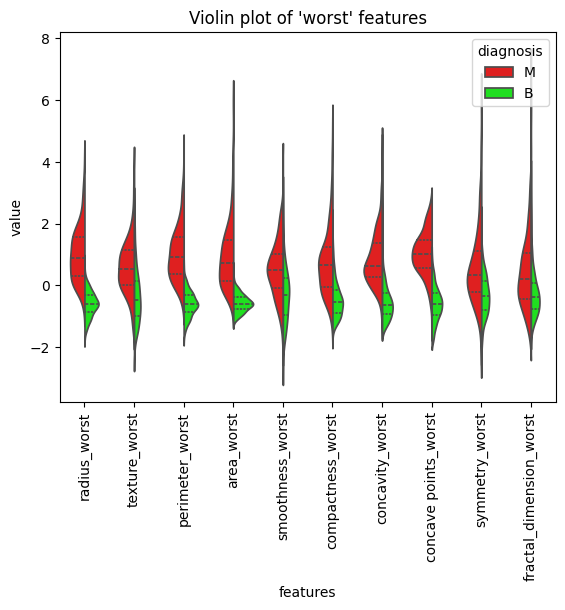

In [ ]:
features_3 = pd.concat([label, noramlised_features.iloc[:,20:31]],axis=1) #creating the next group of feautres for 'worst'
features_3 = pd.melt(features_3, id_vars= 'diagnosis', var_name = 'features', value_name = 'value')

sns.violinplot(x='features', y = 'value', hue = 'diagnosis', data = features_3, split =True, inner = 'quart', palette = custom_colours)
plt.title("Violin plot of 'worst' features")
plt.xticks(rotation = 90);

Similar to the other features it is those related to radius, permieter, area and concavity appear to have a good separation between the groups that can be informative for the model.

Further symmetry and fractal dimension related features don't appear to provide much information to distingush the two groups.

Outliers are also important to consider, these are seen in the tails of the violin plots. These can also be observed by generating box and whisker plots which I have done below. However, it is important to determine if the 'outlier' is due to data mis-entry, natural variation or are these true values? As I am not an expert in this area it is hard to know what is truly noise in the data. These outliers could represent an aggressive form of cancer or a missclassification of that sample due to human error. For the purpose of this study I will leave the outliers but may return to this point if the accuracy of the model is not sufficient.

I have plotted the first 10 features to demonstrate the visual representation.


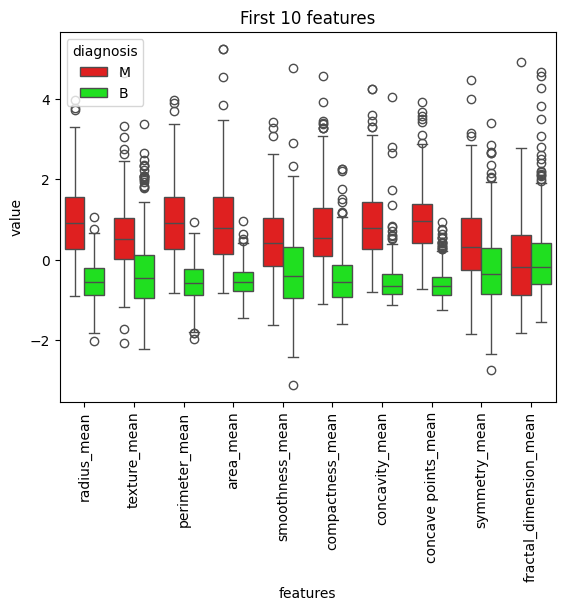

In [ ]:
sns.boxplot(x='features', y= 'value', hue = 'diagnosis', palette = custom_colours, data = features_1)
plt.title('First 10 features')
plt.xticks(rotation=90);

We can also visualise outliers using histograms.

In [ ]:
features_M=features_2[features_2['diagnosis'] =='M'] #dividing data based on malignacy coding 
features_B=features_2[features_2['diagnosis'] =='B']

In [ ]:
selected_rows_M = features_M[features_M['features'] == 'radius_se']
selected_values_M =selected_rows_M['value'] #filtering based on the desired featurea and then extracting only the values 

In [ ]:
selected_rows_B = features_B[features_B['features'] == 'radius_se']
selected_values_B =selected_rows_B['value']

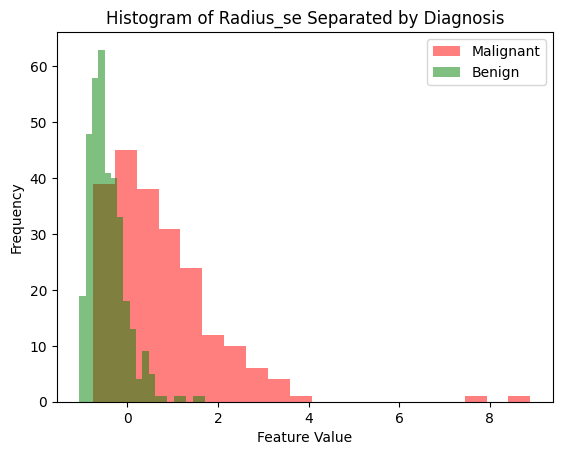

In [ ]:
#plt.hist(features_B['radius_se'], bins=20, alpha = 0.5, label = 'Benign', color= 'green')
plt.hist(selected_values_M, bins=20, alpha = 0.5, label = 'Malignant', color = 'red')
plt.hist(selected_values_B, bins=20, alpha = 0.5, label = 'Benign', color = 'green')


plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Radius_se Separated by Diagnosis')
plt.legend()

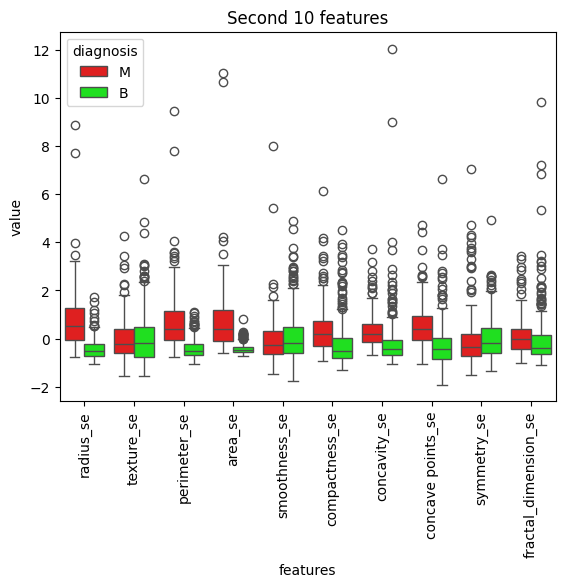

In [ ]:
sns.boxplot(x='features', y= 'value', hue = 'diagnosis', palette = custom_colours, data = features_2)
plt.title('Second 10 features')
plt.xticks(rotation=90);

As mentioned many of these features may be related i.e. area, perimeter and mean. We can visulaise this by creating scatter plots of the relationships between two variables.

In [ ]:
sns.pairplot(df, hue='diagnosis', kind='reg', palette = custom_colours);
plt.title('Pairplot map')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x166a38180> (for post_execute):


KeyboardInterrupt: 

As we can see this is very visually and labour intensive to assess which features are correlated. Zooming in on the plot to go through the individual plots would take some time.

Instead we can generate a correlation matrix, that uses pearsons r as a measure of correlation, and display is as a heatmap. This is more concise and will be easier to pick out the highly correlated features based on colour.

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(feature_df.corr(), annot=True, cmap='Blues');
plt.title('Correlation heatmap');

While this is visually easier to identify the related feautres and see the pearsons variable quite easily I create an interactive heat map below to easily identify the two features.

In [ ]:

# Calculate the correlation matrix
corr_matrix = feature_df.corr();

# Create a list of column names for x-axis and y-axis
columns = list(corr_matrix.columns)
rows = list(corr_matrix.index)

# Convert the correlation matrix to a list of tuples (x, y, value)
data = [(columns[i], rows[j], corr_matrix.iloc[j, i]) for i in range(len(columns)) for j in range(len(rows))]

correlation_df = pd.DataFrame(data)
correlation_df.rename(columns={0: "x", 1: "y", 2: "correlation"}, inplace=True)

source = ColumnDataSource(correlation_df)
color_mapper = LinearColorMapper(palette="Viridis256", low=correlation_df['correlation'].min(), high=correlation_df['correlation'].max())

# Create the Bokeh figure
p = figure(title="Correlation Heatmap", x_range=columns, y_range=list(reversed(rows)),
               toolbar_location=None, tools="hover",
           tooltips=[("Variables", "@y, @x"), ("correlation", "@correlation")])

# Add rectangles representing the correlation values
r = p.rect(x="x", y="y", width=1, height=1, source=source,
           fill_color={'field': 'correlation', 'transform': color_mapper}, line_color=None)

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Variables", "@y, @x"), ("correlation", "@correlation")]
p.add_layout(r.construct_color_bar(
    major_label_text_font_size="7px",
    ticker=BasicTicker(),
    formatter=PrintfTickFormatter(format="%d%%"),
    label_standoff=6,
    border_line_color=None,
    padding=5
), 'right')

p.xaxis.major_label_orientation = 1.5
output_notebook()
show(p)

Loading BokehJS ...

Creating this interactive graph allowed me to easily identify between which two variables were the high correlation. In this graph the darker the brighter the colour the stronger the relationship.

The highly correlated features are as predicted. There are strong correlations between radius, perimeter and area related variables likely due to the intrinsic relationship between these values and the corresponding mathimatical calulations.

Including correlated variables in the model can lead to redundancy as they are both giving us the same information and does not provide additional predictive power and can increase computational load.

To visulaise the correlation between two variables at a closer level than the pairplot I will plot one for easier visulaiton.



In [ ]:
def make_jointplot(feature_1,feature_2):
  pearson_corr = df[feature_1].corr(df[feature_2])

  corr_var = sns.jointplot(x=feature_1, y=feature_2, data=df, kind='reg')

  corr_var.ax_joint.annotate(f"Pearson's r = {pearson_corr:.2f}", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
  corr_var.fig.suptitle(feature_1 + ' vs ' + feature_2)
  plt.show()



Here I created a function to generate a jointplot between two chosen features. This makes it easier for me create several of the same graphs on my chosen features, thus reducing my need to rewrite code.


In [ ]:
make_jointplot('area_worst','perimeter_worst')
make_jointplot('radius_se', 'area_se')
make_jointplot('radius_mean', 'perimeter_mean')

As we can see these two variables are almost identical. They all have a positive correlation so that as one increases so does the other. The majority of points also cluster tightly around the line and this is captured by the high pearson's r correlation coefficient.

To conclude this section we found:
- There is an imbalance in the number of labels, as seen in the bar graph and the summary stats, that needs to be considered when choosing the machine learning model.
- Biology is highly complex, this is seen in the similarities of values between of certain features in the violin plots, which might increase the complexity of the model as a larger number of features may be needed to build an accurate model.
- Potential outliers, which is hard to definitively determine are true noise due to the need for collaboration with experts in the area, in the data might impact the accuracy of the model. If satisfactory accuracy cannot be reached we may need to remove these values. These can be seen in the tails of the violin plots and the box plots.
- We need to consider carefully which features we want to include in our model as there is a high degree of correlation between features that would lead to redundancy and increased computational load in the final model.

#Model Building

Since we are classifying the sample into one of two options I am going to begin with a random forest classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.feature_selection import RFECV

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0}) #here we changed the label to 0 and 1 in order to try different catagorical models as it needs to be in this format tfor logistic regression.
df.head()#confirming the change

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
label_binary = df.diagnosis # assigning the diagnosis coding to a variable as our labels. This only contains the benign or malignant variables
feature_df = df.drop('diagnosis', axis =1) #contains all the data but the labels that we may use to train the model.


To select the best model and hyperparamters I am going to use grid search cross-validation.

Below I have stored the three models to catagorise data in the form of a dictionary. There is a nested dictionary with the model object and the hyperparameters I want to investigate.



In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', random_state=10),
        'params': {
            'C': [0.1, 1, 10, 100],  # Regularisation parameter
            'kernel': ['sigmoid'],  # Kernel type, using sigmoid as it is binary 
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=10),
        'params': {
            'n_estimators': [50, 100, 200],  # Number of trees in the forest
            'max_depth': [ 5, 10, 20],  # Maximum depth of the tree
            'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',random_state=10),
        'params': {
            'C': [0.1, 1, 10],  # Regularisation parameter
            'penalty': ['l1', 'l2']  # Penalty term ('l1' for Lasso, 'l2' for Ridge)

        }
    }
}


NameError: name 'svm' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, label_binary, test_size=0.3, random_state=10)

In [ ]:
scores = []
count = 0

for model_name, mp in model_params.items():
    count += 1
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose = 2, n_jobs=-1)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(count)

df_models = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_models

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ...............................C=10, kernel=sigmoid; total time=   0.0s
[CV] END ...............................C=10, ker

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=   0.1s
[CV] END ...................

,model,best_score,best_params
0,svm,0.615601,"{'C': 0.1, 'kernel': 'sigmoid'}"
1,random_forest,0.962247,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
2,logistic_regression,0.957215,"{'C': 10, 'penalty': 'l1'}"


In [ ]:
print(df_models.to_string())

                 model  best_score                                                                            best_params
0                  svm    0.615601                                      {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
1        random_forest    0.962247  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
2  logistic_regression    0.957215                                                             {'C': 10, 'penalty': 'l1'}


I want to use RF becasue i said so 

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=10)
rfe_cv = RFECV(estimator=rf_classifier, step=1, cv=5,scoring='accuracy')

rfe_cv = rfe_cv.fit(x_train, y_train) #fitting the cross validated model to the training data
best_features =  x_train.columns[rfe_cv.support_] #removing the best columns and saving as a variable

print('Optimal amount of features :', rfe_cv.n_features_)
print('Best selected features :', x_train.columns[rfe_cv.support_])

Optimal amount of features : 15
Best selected features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


RF are also robust to outliers as mentioned earlier

In [ ]:
#filtering my df for the columns with the most importance 
selected_features = x_train.columns[rfe_cv.support_]
rf_classifier.fit(x_train[selected_features], y_train) #fitting it to the data only with the selected columns

# Extract feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

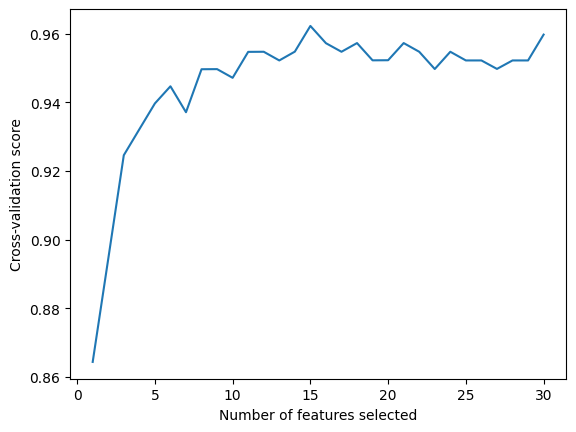

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
#creatng a filtered df to use going forward
filtered_df = df.loc[:, best_features]

In [ ]:
x_train_bf, x_test_bf, y_train_bf, y_test_bf = train_test_split(filtered_df, label_binary, test_size=0.3, random_state=10)

Feature ranking:
1. feature 9 (0.156854)
2. feature 5 (0.140983)
3. feature 14 (0.139863)
4. feature 10 (0.132573)
5. feature 7 (0.104111)
6. feature 3 (0.051190)
7. feature 2 (0.046999)
8. feature 4 (0.043037)
9. feature 13 (0.041232)
10. feature 6 (0.037625)
11. feature 8 (0.026221)
12. feature 0 (0.023019)
13. feature 1 (0.019945)
14. feature 11 (0.019241)
15. feature 12 (0.017107)


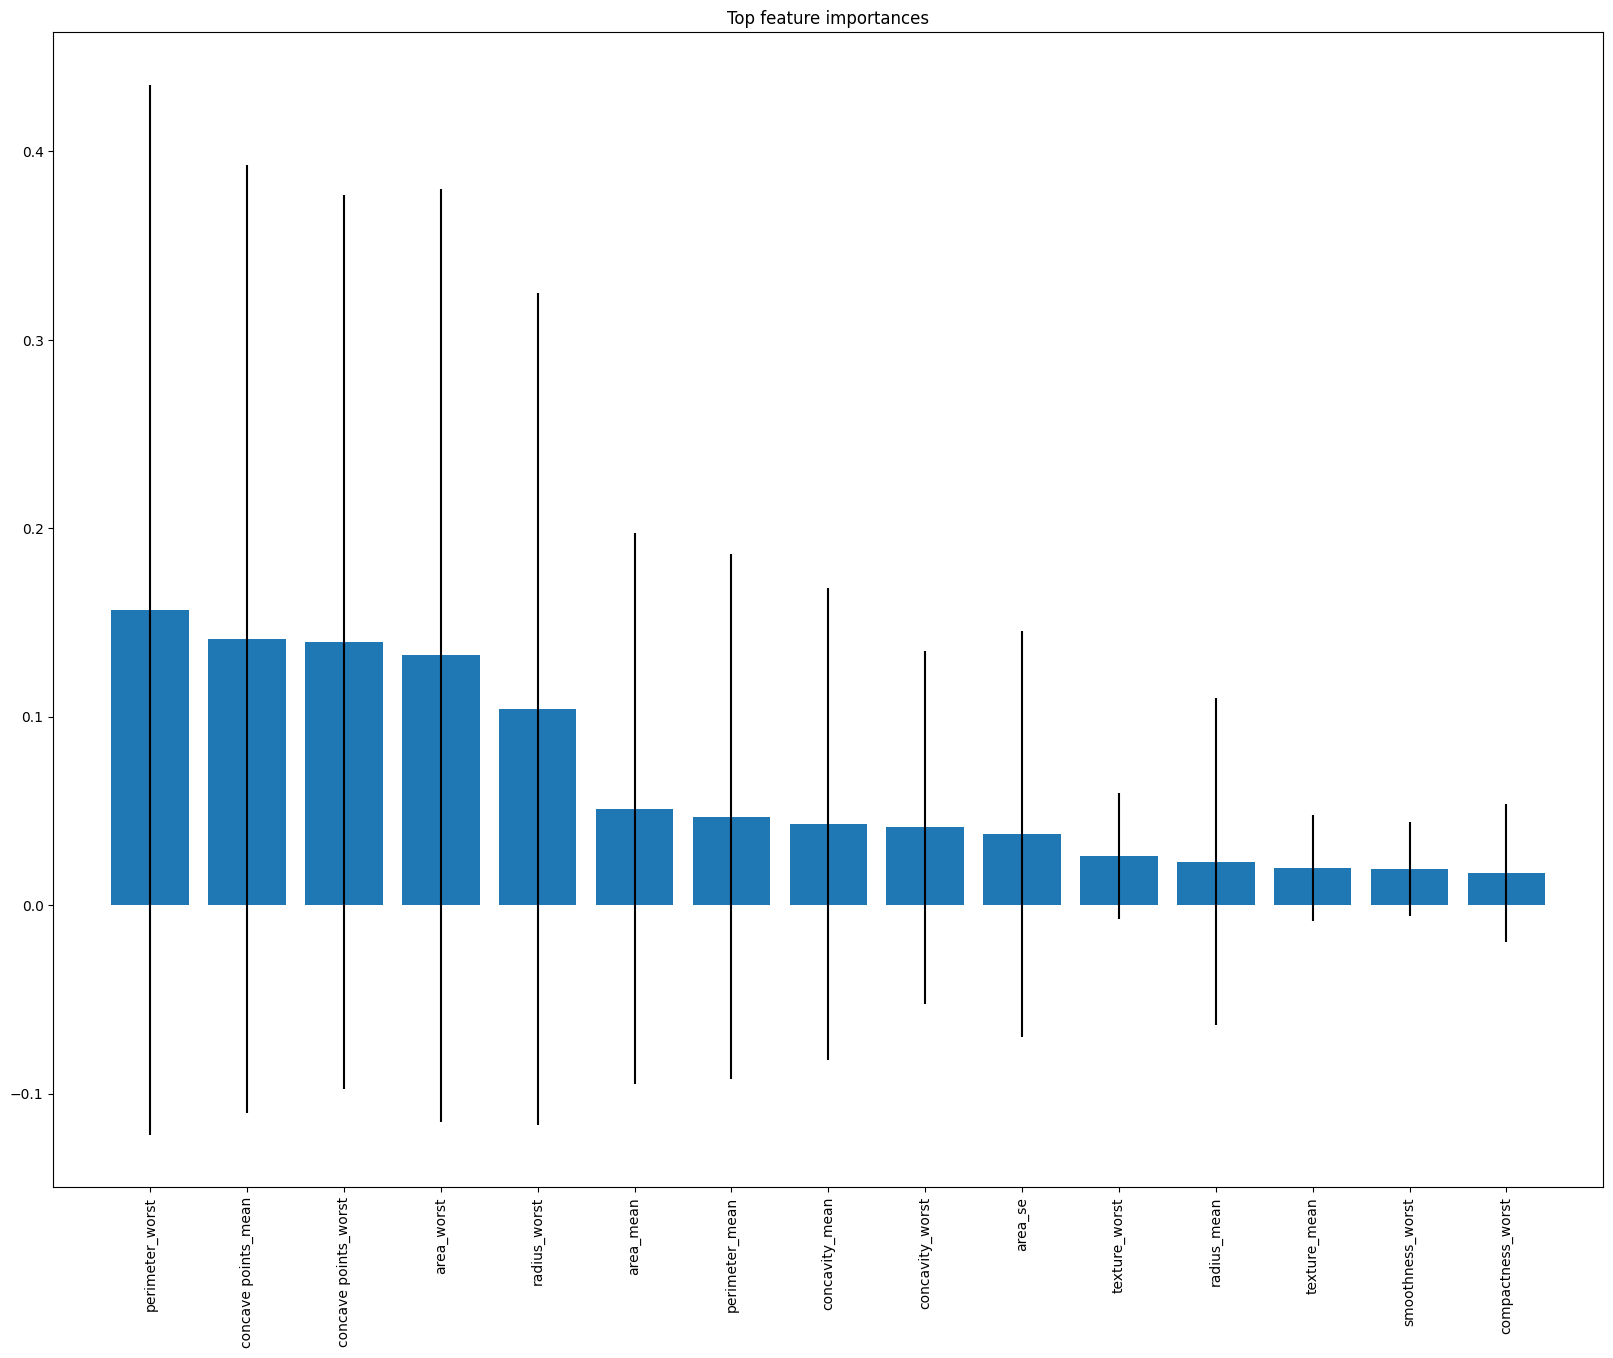

In [ ]:
rf_classifier    
rf_bf = rf_classifier.fit(x_train_bf,y_train_bf)
importances = rf_bf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_bf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train_bf.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 15))
plt.title("Top feature importances")
plt.bar(range(x_train_bf.shape[1]), importances[indices],
        yerr=std[indices], align="center")
plt.xticks(range(x_train_bf.shape[1]), x_train_bf.columns[indices],rotation=90)
plt.xlim([-1, x_train_bf.shape[1]])
plt.show()

Accuracy of RF model with all parameters is:  0.9824561403508771


<Axes: >

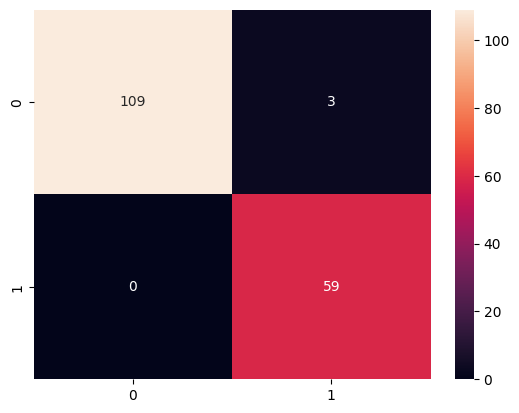

In [ ]:
y_pred_bf = rf_bf.predict(x_test_bf)

accuracy_rf_1 = accuracy_score(y_test_bf,y_pred_bf)
print('Accuracy of RF model with all parameters is: ', accuracy_rf_1)

con_mat_rf_1 = confusion_matrix(y_test_bf,y_pred_bf)
sns.heatmap(con_mat_rf_1, annot=True, fmt = 'd')


In [ ]:
accuracy = accuracy_score(y_test_bf, y_pred_bf)
precision = precision_score(y_test_bf, y_pred_bf)
recall = recall_score(y_test_bf, y_pred_bf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9824561403508771
Precision: 0.9516129032258065
Recall: 1.0


Including all variables in the model gives us an accuarcy of 98% meaning that only 2 in 100 people would get an incorrect classification. However, the dataset is rather unbalanced so we can look at the other values of precision and recall. With a value of 1 for recall the model does not miss any positive diagnosis but it does incorretly label some as positive as the precision is 95%.

In the context of diagnosing cancer this is likely acceptable that no positive cases are missed but some negative cases could be sent for further testing.

To do:

Going to sseparate out the RFC to plot the bar graph and the number of features line graps.

Need to think of one more matplotlib graph.



#Machine Learning.

potential predicitions:
- can ad to the model with other factors such as age
- Can add to the model with more tu our characteristics to give finer diagnosis
- can add to the model to gice prognostic information.
- can use to understand treatment efficacy.
- diagnositc biomarkers
- understanding risk factors can inform